In [1]:
#Memanggil lib pandas python untuk membaca table dari frame.len
import pandas as pd
df=pd.read_table("frame.len")

In [2]:
#Menampilkan data frame.len
df.head()

frame.number  frame.len
0             1        198
1             2         60
2             3        175
3             4        208
4             5         86

In [3]:
df["frame.len"].describe()

count    183725.000000
mean        209.435406
std         341.104282
min          42.000000
25%          64.000000
50%          88.000000
75%         135.000000
max        2059.000000
dtype: float64

In [4]:
#memanggil lib pylab,numpy dan grafik matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


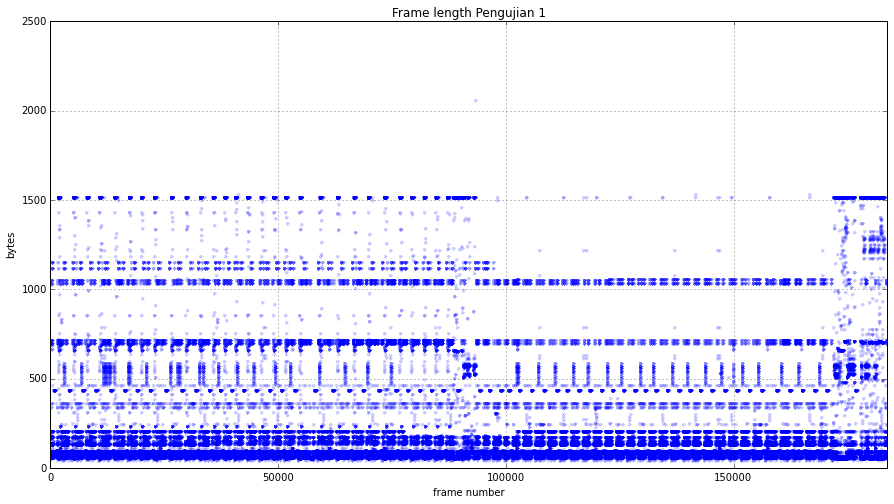

In [5]:
#generate grafik dari data frame.len
df["frame.len"].plot(style=".", alpha=0.2,figsize=(15,8))
title("Frame length Pengujian 1")
ylabel("bytes")
xlabel("frame number")

In [6]:
#Berikut merupakan hasil ektrak dari file pengujian1.pcap

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
#membaca data dari file pengujian1.csv
pengujian1=pd.read_csv("pengujian1.csv", parse_dates=['Time'])
pengujian1.head()

No.                Time                     Source        Destination  \
0    1 2015-12-07 17:53:38              10.100.203.58       10.100.203.8   
1    2 2015-12-07 17:53:38               10.100.203.8      10.100.203.58   
2    3 2015-12-07 17:53:38              10.100.203.19    239.255.255.250   
3    4 2015-12-07 17:53:38  fe80::dd56:a1ba:cc58:814d            ff02::c   
4    5 2015-12-07 17:53:38  fe80::dd56:a1ba:cc58:814d  ff02::1:ffc8:ae8c   

  Protocol  Length                                               Info  
0      SSH     198                 Server: Encrypted packet (len=144)  
1      TCP      60       58235 > 22 [ACK] Seq=1 Ack=145 Win=256 Len=0  
2     SSDP     175                               M-SEARCH * HTTP/1.1   
3     SSDP     208                               M-SEARCH * HTTP/1.1   
4   ICMPv6      86  Neighbor Solicitation for fe80::a90f:8528:17c8...

In [10]:
#Desktripsi dari file ektrak pengujian1.pcap
pengujian1.describe()

No.         Length
count  183725.000000  183725.000000
mean    91863.000000     209.435406
std     53036.983441     341.104282
min         1.000000      42.000000
25%     45932.000000      64.000000
50%     91863.000000      88.000000
75%    137794.000000     135.000000
max    183725.000000    2059.000000

In [11]:
#Deskripsi dari Info dari file pengujian1.pcap
pengujian1['Info'].describe()

count                   182379
unique                   24032
top       M-SEARCH * HTTP/1.1 
freq                     13537
dtype: object

In [12]:
#Menampilkan data tertentu berupa Time,Source IP, Destination IP, Protocol,Length,Info dari file pengujian1
infodata = pengujian1[['Time','Source','Destination','Protocol',
                  'Length','Info']]

In [13]:
infodata.head()

Time                     Source        Destination Protocol  \
0 2015-12-07 17:53:38              10.100.203.58       10.100.203.8      SSH   
1 2015-12-07 17:53:38               10.100.203.8      10.100.203.58      TCP   
2 2015-12-07 17:53:38              10.100.203.19    239.255.255.250     SSDP   
3 2015-12-07 17:53:38  fe80::dd56:a1ba:cc58:814d            ff02::c     SSDP   
4 2015-12-07 17:53:38  fe80::dd56:a1ba:cc58:814d  ff02::1:ffc8:ae8c   ICMPv6   

   Length                                               Info  
0     198                 Server: Encrypted packet (len=144)  
1      60       58235 > 22 [ACK] Seq=1 Ack=145 Win=256 Len=0  
2     175                               M-SEARCH * HTTP/1.1   
3     208                               M-SEARCH * HTTP/1.1   
4      86  Neighbor Solicitation for fe80::a90f:8528:17c8...

In [14]:
#Soure IP,destination IP dan Protocol di kelompokkan kemudian panjang paket di jumlahkan
category_group=infodata.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

Length
Source                       Destination     Protocol        
0.0.0.0                      224.0.0.1       IGMPv2     23350
                             255.255.255.255 DHCP       23159
0:1603:303:bf0b:3:bb00:3b8:3 ff02::1         ICMPv6        86
0:4000:102:417::e000:1       ff02::1         ICMPv6        86
10.100.130.3                 10.100.203.58   NTP         1620

In [15]:
#my_plot = category_group.plot(kind='pie',autopct='%.2f', fontsize=20,subplots=True, figsize=(90,90))

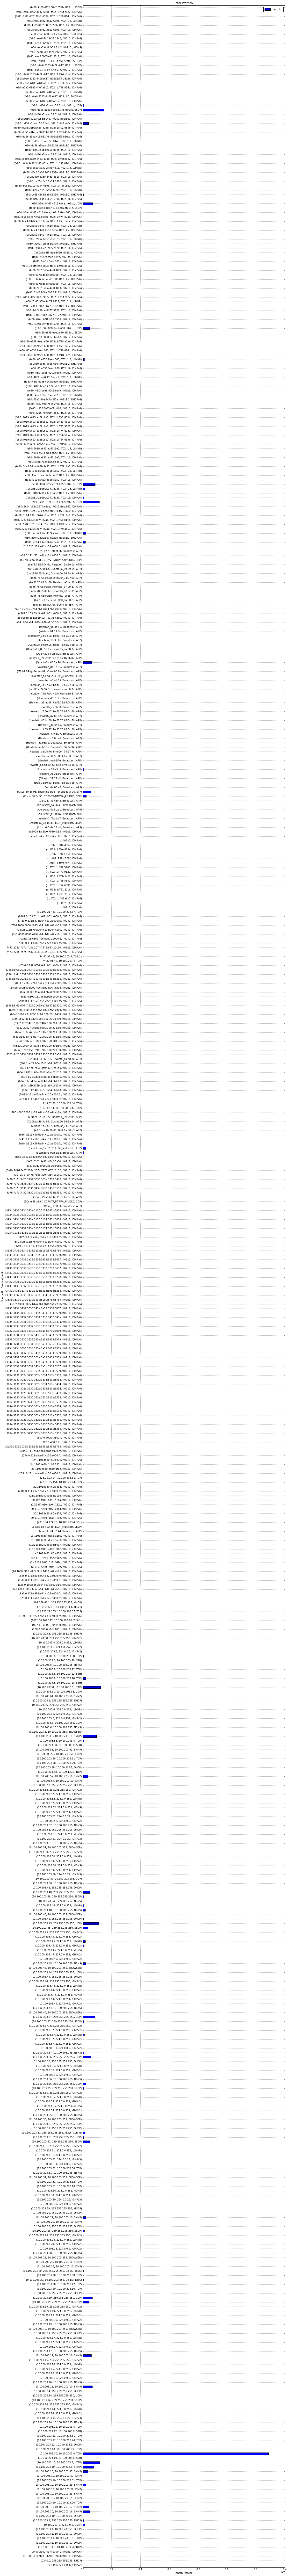

In [16]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Total Protocol",figsize=(15, 190))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [17]:
category_group.unstack().head()

Length                     \
Protocol                                      ADwin Config  ARP  BROWSER  CDP   
Source                       Destination                                        
0.0.0.0                      224.0.0.1                 NaN  NaN      NaN  NaN   
                             255.255.255.255           NaN  NaN      NaN  NaN   
0:1603:303:bf0b:3:bb00:3b8:3 ff02::1                   NaN  NaN      NaN  NaN   
0:4000:102:417::e000:1       ff02::1                   NaN  NaN      NaN  NaN   
10.100.130.3                 10.100.203.58             NaN  NaN      NaN  NaN   

                                                                          \
Protocol                                      DB-LSP-DISC   DHCP  DHCPv6   
Source                       Destination                                   
0.0.0.0                      224.0.0.1                NaN    NaN     NaN   
                             255.255.255.255          NaN  23159     NaN   
0:1603:303:bf0b:3:bb00:3b8:3 ff02::1                  NaN    NaN     NaN   
0:4000:102:417::e000:1       ff02::1                  NaN    NaN     NaN   
10.100.130.3                 10.100.203.58            NaN    NaN     NaN   

                                                                   ...    \
Protocol                                      HTTP  ICMP  ICMPv6   ...     
Source                       Destination                           ...     
0.0.0.0                      224.0.0.1         NaN   NaN     NaN   ...     
                             255.255.255.255   NaN   NaN     NaN   ...     
0:1603:303:bf0b:3:bb00:3b8:3 ff02::1           NaN   NaN      86   ...     
0:4000:102:417::e000:1       ff02::1           NaN   NaN      86   ...     
10.100.130.3                 10.100.203.58     NaN   NaN     NaN   ...     

                                                                               \
Protocol                                      OSPF  SNMP  SSDP  SSH  SSL  STP   
Source                       Destination                                        
0.0.0.0                      224.0.0.1         NaN   NaN   NaN  NaN  NaN  NaN   
                             255.255.255.255   NaN   NaN   NaN  NaN  NaN  NaN   
0:1603:303:bf0b:3:bb00:3b8:3 ff02::1           NaN   NaN   NaN  NaN  NaN  NaN   
0:4000:102:417::e000:1       ff02::1           NaN   NaN   NaN  NaN  NaN  NaN   
10.100.130.3                 10.100.203.58     NaN   NaN   NaN  NaN  NaN  NaN   

                                                                    
Protocol                                      TCP  TLSv1  UDP  XID  
Source                       Destination                            
0.0.0.0                      224.0.0.1        NaN    NaN  NaN  NaN  
                             255.255.255.255  NaN    NaN  NaN  NaN  
0:1603:303:bf0b:3:bb00:3b8:3 ff02::1          NaN    NaN  NaN  NaN  
0:4000:102:417::e000:1       ff02::1          NaN    NaN  NaN  NaN  
10.100.130.3                 10.100.203.58    NaN    NaN  NaN  NaN  

[5 rows x 28 columns]

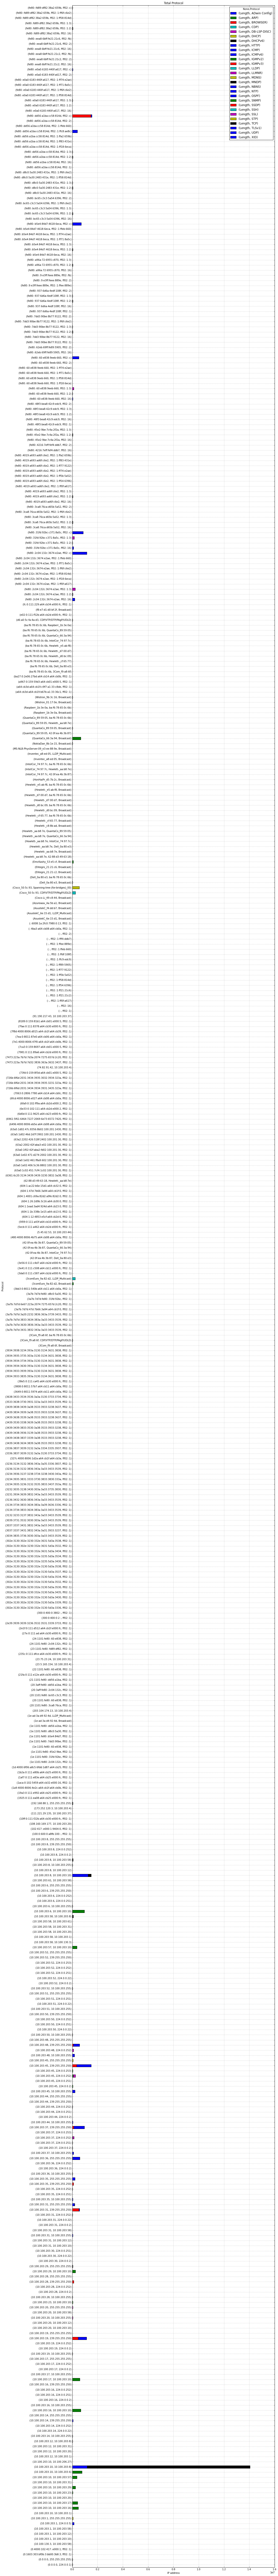

In [18]:
my_plot = category_group.unstack().plot(kind='barh',stacked=True,title="Total Protocol",figsize=(15, 190))
my_plot.set_xlabel("IP address")
my_plot.set_ylabel("Protocol")

In [19]:
infodata2 = pengujian1[['Time','Length','Info']]
infodata2.head()

Time  Length  \
0 2015-12-07 17:53:38     198   
1 2015-12-07 17:53:38      60   
2 2015-12-07 17:53:38     175   
3 2015-12-07 17:53:38     208   
4 2015-12-07 17:53:38      86   

                                                Info  
0                 Server: Encrypted packet (len=144)  
1       58235 > 22 [ACK] Seq=1 Ack=145 Win=256 Len=0  
2                               M-SEARCH * HTTP/1.1   
3                               M-SEARCH * HTTP/1.1   
4  Neighbor Solicitation for fe80::a90f:8528:17c8...

In [20]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

Length                                               Info
Time                                                                          
2015-12-07 17:53:38     198                 Server: Encrypted packet (len=144)
2015-12-07 17:53:38      60       58235 > 22 [ACK] Seq=1 Ack=145 Win=256 Len=0
2015-12-07 17:53:38     175                               M-SEARCH * HTTP/1.1 
2015-12-07 17:53:38     208                               M-SEARCH * HTTP/1.1 
2015-12-07 17:53:38      86  Neighbor Solicitation for fe80::a90f:8528:17c8...

In [21]:
infodata2.resample('T',how=sum).head()

Length
Time                       
2015-12-07 17:53:00   19671
2015-12-07 17:54:00   89230
2015-12-07 17:55:00  495216
2015-12-07 17:56:00   55966
2015-12-07 17:57:00   62073

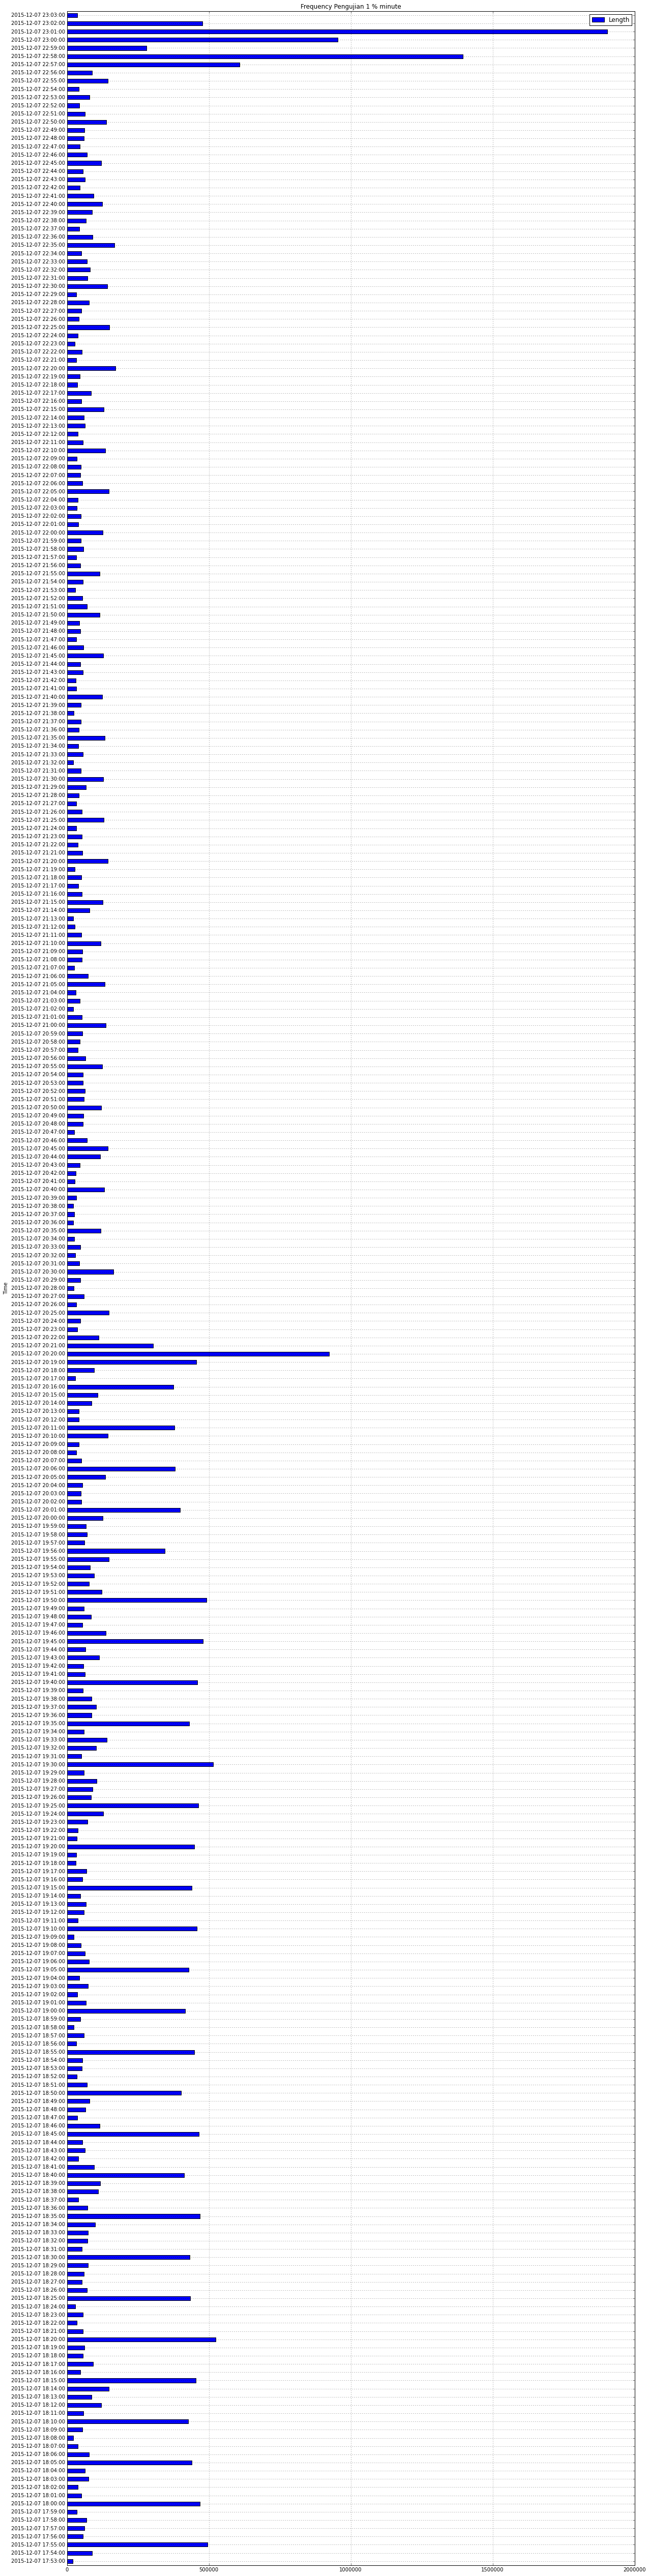

In [22]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency Pengujian 1 % minute",style="r",figsize=(20,90))

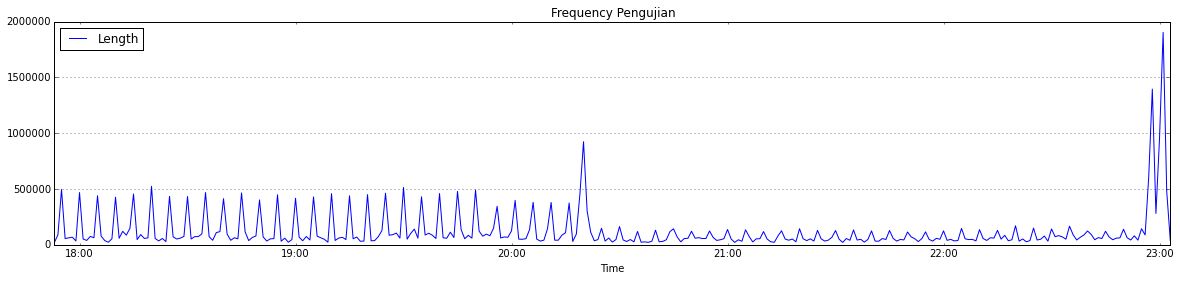

In [28]:
infodata2_plot = infodata2.resample('T',how=sum).plot(title="Frequency Pengujian",figsize=(20,4))